# EDA on Used Cars Data

Exploratory Data Analysis (EDA) is a method of analyzing datasets to understand their main characteristics. It involves summarizing data features, detecting patterns, and uncovering relationships through visual and statistical techniques. EDA helps in gaining insights and formulating hypotheses for further analysis.

What is Data Pre-processing and Feature Engineering?

In our data-driven processes, we prioritize refining our raw data through the crucial stages of EDA (Exploratory Data Analysis). Both data pre-processing and feature engineering play pivotal roles in this endeavor. EDA involves a comprehensive range of activities, including data integration, analysis, cleaning, transformation, and dimension reduction.

Data pre-processing involves cleaning and preparing raw data to facilitate feature engineering. Meanwhile, feature engineering entails employing various techniques to manipulate the data. This may include adding or removing relevant features, handling missing data, encoding variables, and dealing with categorical variables, among other tasks.

Undoubtedly, feature engineering is a critical task that significantly influences the outcome of a model. It involves crafting new features based on existing data while pre-processing primarily focuses on cleaning and organizing the data.

# Step 1: Import Python Libraries

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Step 2: Reading Dataset

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In [8]:
df=pd.read_csv("used_cars_data.csv")

#head() will display the top 5 observations of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
#tail() will display the last 5 observations of the dataset
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [7]:
# shape – shape will display the number of observations(rows) and features(columns) in the dataset
df.shape

(7253, 14)

info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


data.info() shows the variables Mileage, Engine, Power, Seats, New_Price, and Price have missing values. Numeric variables like Mileage, Power are of datatype as  float64 and int64. Categorical variables like Location, Fuel_Type, Transmission, and Owner Type are of object data type

Check for Duplication
* nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [11]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

Missing Values Calculation:

* isnull() is widely been in all pre-processing steps to identify null values in the data

* In our example, data.isnull().sum() is used to get the number of missing records in each column

In [12]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [13]:
# The below code helps to calculate the percentage of missing values in each column

(df.isnull().sum()/(len(df)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

len(df):

* Returns the total number of rows in the DataFrame.

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively.

# Step 3: Data Reduction

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column S.No have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [16]:
df=df.drop("S.No.",axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


We start our Feature Engineering as we need to add some columns required for analysis.

# Step 4: Feature Engineering

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

# Step 5: Creating Features

We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car.

It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. 

Introducing a new column, “Car_Age” to know the age of the car

In [19]:
from datetime import date
date.today().year

2024

In [20]:
df["Car_Age"]=date.today().year - df["Year"]

In [21]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


* Since car names will not be great predictors of the price in our current data.
* But we can process this column to extract important information using brand and Model names.
* Let’s split the name and introduce new variables “Brand” and “Model”

In [22]:
df["Brand"]= df.Name.str.split().str.get(0)

df.Name:
* Refers to the column named "Name" in the DataFrame df.

.str.split():
* Splits the string in each entry of the column "Name" into a list of words based on whitespace by default.

.str.get(0):
* Retrieves the first element (index 0) of the list generated from the split for each row.

In [23]:
df["Model"]= df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)

In [24]:
df[["Name", "Brand","Model"]]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


# Step 6: Data Cleaning/Wrangling

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.

In the example, The brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect. This needs to be corrected

In [26]:
print(df.Brand.unique())
print(df.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [27]:
searchfor = ["Isuzu","ISUZU","Mini","Land"]

This is the list of strings you want to search for in the Brand column.

In [28]:
df[df.Brand.str.contains("|".join(searchfor))].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible


"|".join(searchfor):
* Joins the strings in the searchfor list with the pipe (|) character, which is used as an "OR" operator in regular expressions.
* Result: "Isuzu|ISUZU|Mini|Land"

df.Brand.str.contains("|".join(searchfor)):
* This checks whether each value in the Brand column contains any of the strings in the searchfor list.
* The str.contains() method returns a boolean Series (True for matching rows, False otherwise).

df[df.Brand.str.contains("|".join(searchfor))]:
* Filters the rows in the DataFrame where the Brand column matches the condition.

In [29]:
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [30]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

# Step 7: EDA Exploratory Data Analysis

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

* EDA can be leveraged to check for outliers, patterns, and trends in the given data.
* EDA helps to find meaningful patterns in data.
* EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset 

# Step 8: Statistics Summary

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [33]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the statistics summary, we can infer the below findings :

* Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
* On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
* Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
* It looks like Engine and Power have outliers, and the data is right-skewed.
* The average number of seats in a car is 5. car seat is an important feature in price contribution.
* The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.
* describe(include=’all’) provides a statistics summary of all data, include object, category etc

Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [34]:
cat_cols=df.select_dtypes(include=["object"]).columns


df.select_dtypes(include=["object"]):
* This filters the DataFrame df to include only columns with a data type of object.
* In pandas, columns with object dtype usually represent categorical or string data.

.columns:
* Retrieves the column names of the filtered DataFrame as an Index object.

Assignment to cat_cols:
* Stores the column names in the variable cat_cols.

Purpose
* Identify Categorical Columns: Use this to find columns that are likely non-numerical, such as strings or other categorical data.
* Efficient Column Processing: Helps in targeting only specific columns for encoding, analysis, or visualization.

In [35]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()

df.select_dtypes(include=np.number):
* Filters the DataFrame df to include only columns with numeric data types (e.g., int64, float64).
* np.number is a shorthand to capture all numeric types.

.columns:
* Retrieves the column names of the filtered DataFrame as an Index object.

.tolist():
* Converts the Index object containing column names into a Python list.

Assignment to num_cols:

* Stores the list of numeric column names in the variable num_cols.

Purpose
* Identify Numeric Columns: Useful for operations or analysis that specifically require numeric data (e.g., aggregations, scaling, machine learning models).
* Automate Processing: Makes it easy to isolate numerical columns for tasks like feature scaling, imputation, or statistical analysis.

In [36]:
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


# Step 9: EDA Univariate Analysis

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data.  We visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

Year
Skew : -0.84


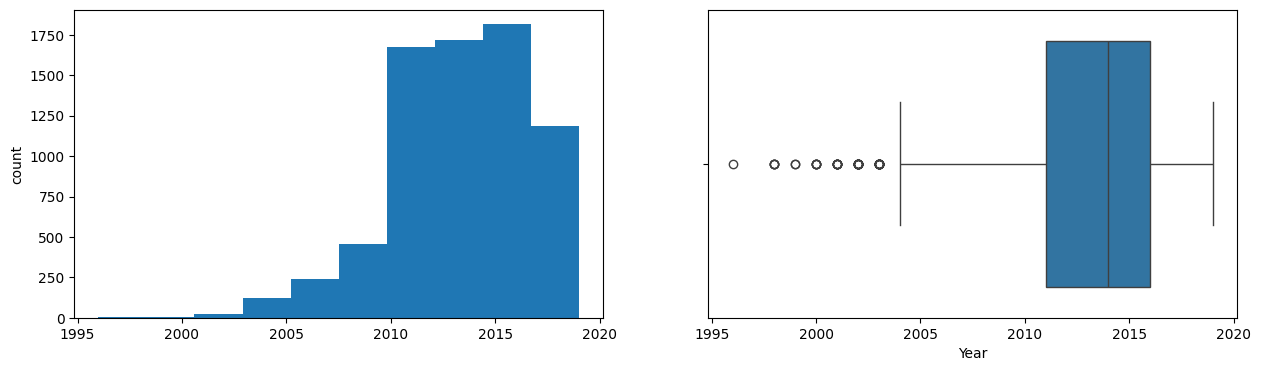

Kilometers_Driven
Skew : 61.58


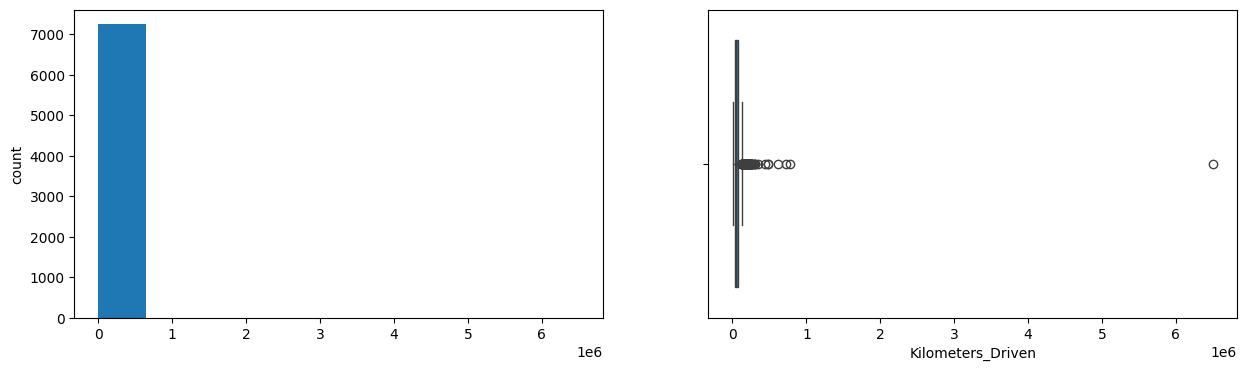

Seats
Skew : 1.9


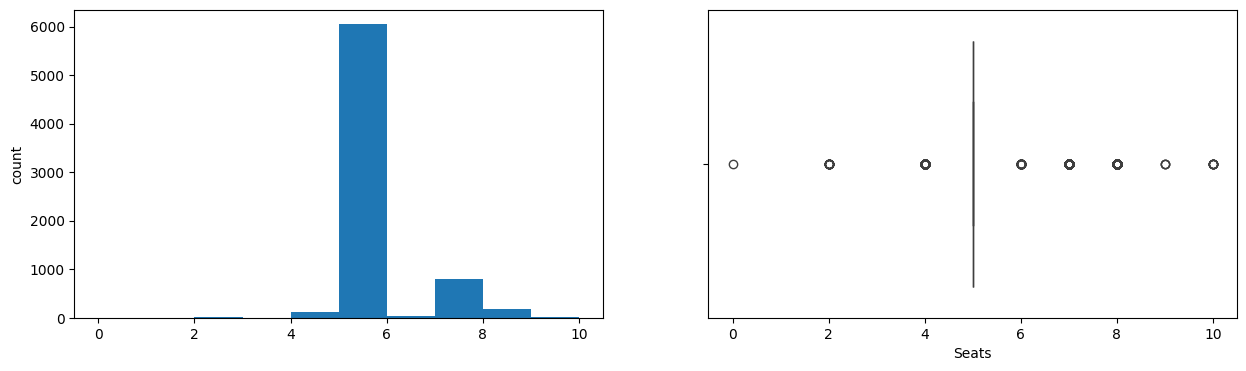

Price
Skew : 3.34


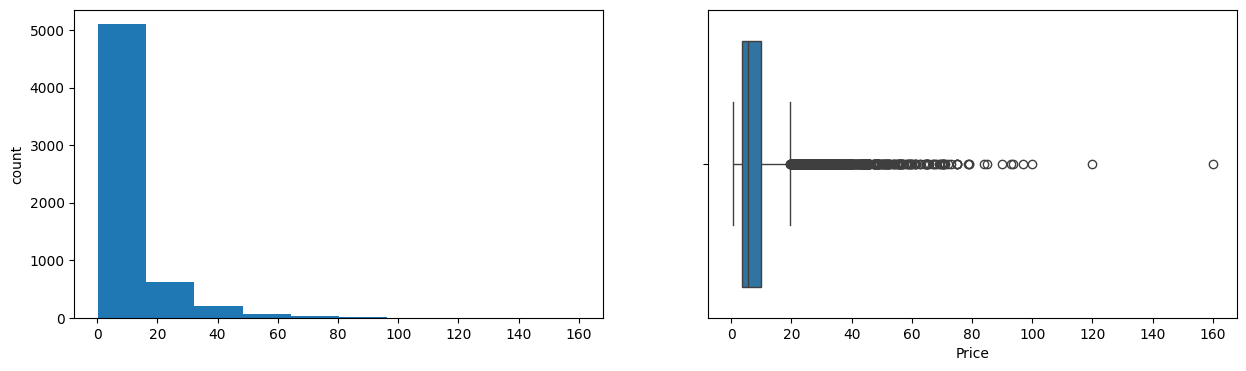

Car_Age
Skew : 0.84


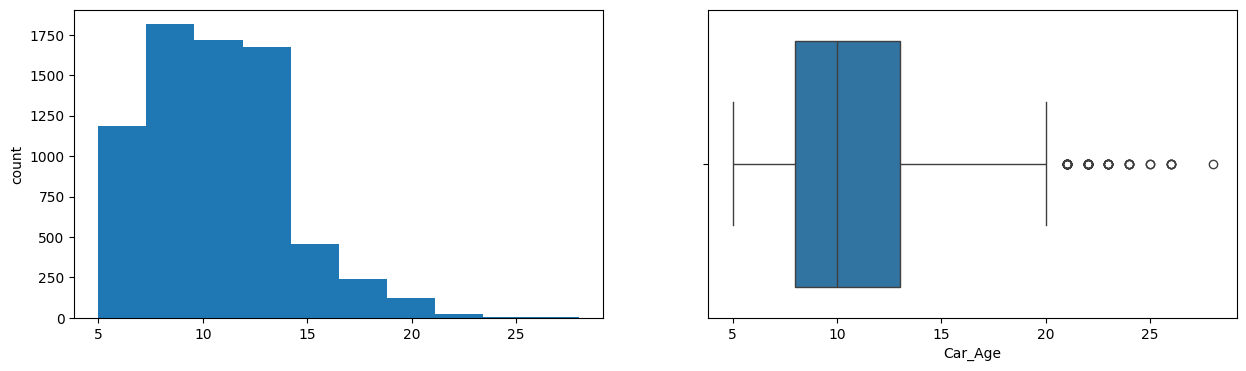

In [39]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Code Breakdown
for col in num_cols::
* Iterates over each numerical column in the list num_cols.

print(col):
* Prints the name of the current column being analyzed.

print('Skew :', round(df[col].skew(), 2)):
* Calculates and prints the skewness of the column:
    * Skewness measures the asymmetry of a distribution.
        * A skew of 0 means the data is perfectly symmetric.
        * Positive skew indicates a long tail to the right.
        * Negative skew indicates a long tail to the left.

plt.figure(figsize=(15, 4)):
* Sets the figure size for the plots.

plt.subplot(1, 2, 1):
* Creates the first subplot (a 1x2 grid of plots, first position) for the histogram.

df[col].hist(grid=False):
* Plots a histogram of the column's values to visualize the distribution.

plt.ylabel('count'):
* Adds a label to the y-axis of the histogram.

plt.subplot(1, 2, 2):
* Creates the second subplot (a 1x2 grid of plots, second position) for the boxplot.

sns.boxplot(x=df[col]):
* Uses Seaborn to plot a boxplot of the column’s values. This helps visualize:
        * The spread of the data.
        * The presence of outliers (points outside the whiskers).

plt.show():
* Displays the plots for the current column.


Price and Kilometers Driven are right skewed for this data to be transformed, and all outliers will be handled during imputation

categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car pricePrice and Kilometers Driven are right skewed for this data to be transformed, and all outliers will be handled during imputation

categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price

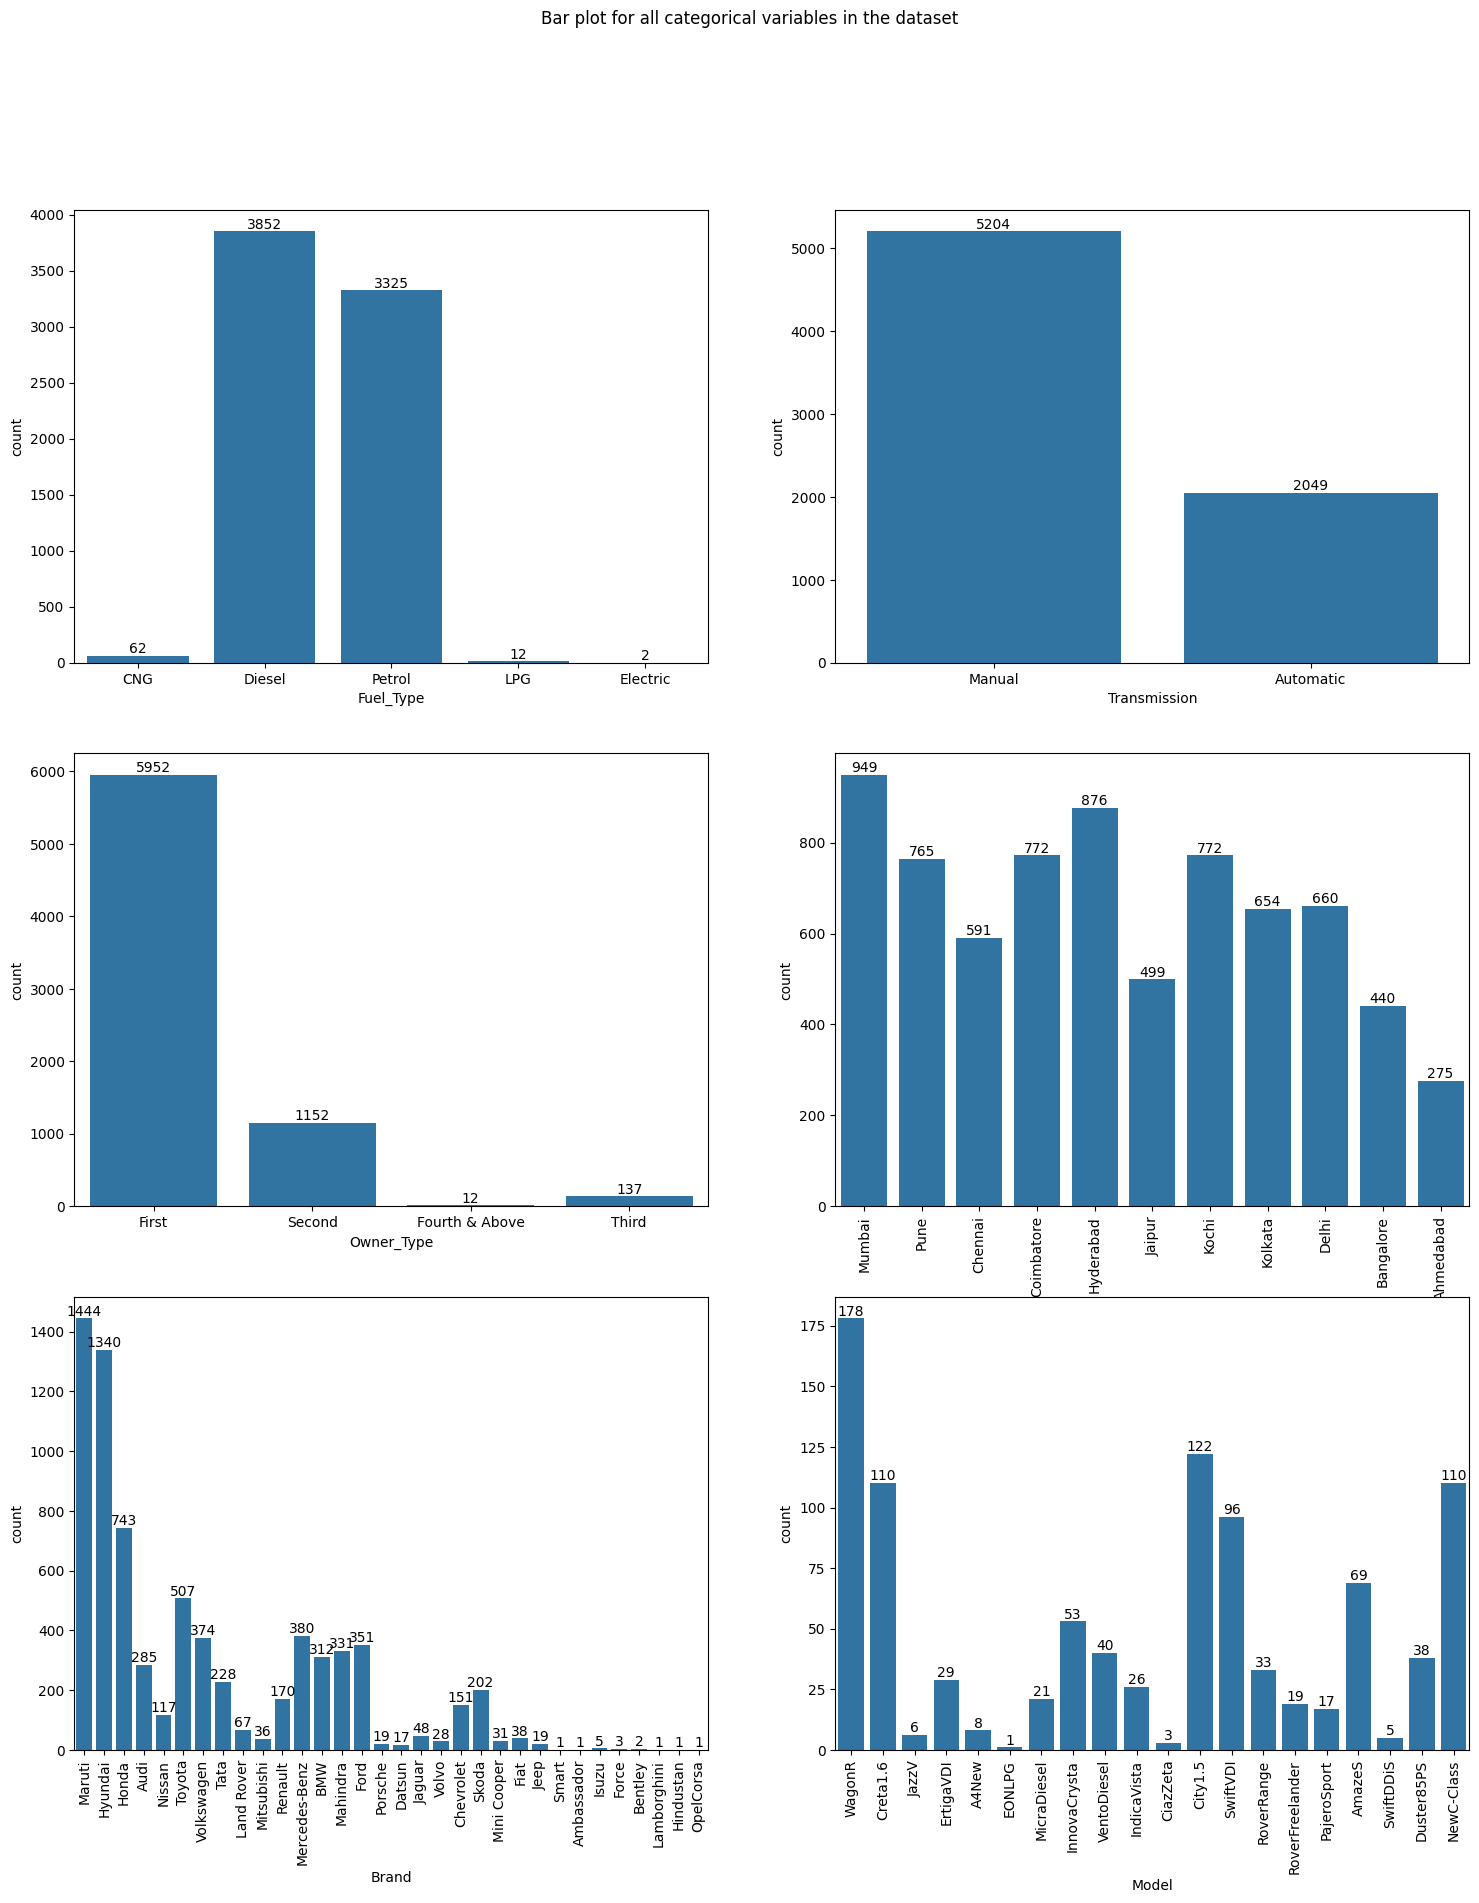

In [66]:
plt.figure(figsize=(18,20))
plt.suptitle('Bar plot for all categorical variables in the dataset')

plt.subplot(3,2,1)
ax=sns.countplot(df,x="Fuel_Type")
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(3,2,2)
ax=sns.countplot(df,x="Transmission")
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(3,2,3)
ax=sns.countplot(df,x="Owner_Type")
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.subplot(3,2,4)
ax=sns.countplot(df,x="Location")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

plt.subplot(3,2,5)
ax=sns.countplot(df,x="Brand")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

plt.subplot(3,2,6)
ax=sns.countplot(df,x="Model",order=df["Model"].head(20))
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)

plt.show()

From the count plot, we can have below observations

* Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
* 53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
* 72% of cars have manual transmission
* 82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
* 20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
* WagonR ranks first among all models which are available for purchase

# Step 10: Data Transformation

Before we proceed to Bi-variate Analysis, Univariate analysis demonstrated the data pattern as some variables to be transformed.

Price and Kilometer-Driven variables are highly skewed and on a larger scale. Let’s do log transformation.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables:

In [79]:
# Function for log transformation of the column
def log_transform(df,col):
    for colname in col:
        if (df[colname] == 1.0).all():
            df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    df.info()

In [80]:
log_transform(df,["Kilometers_Driven","Price"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

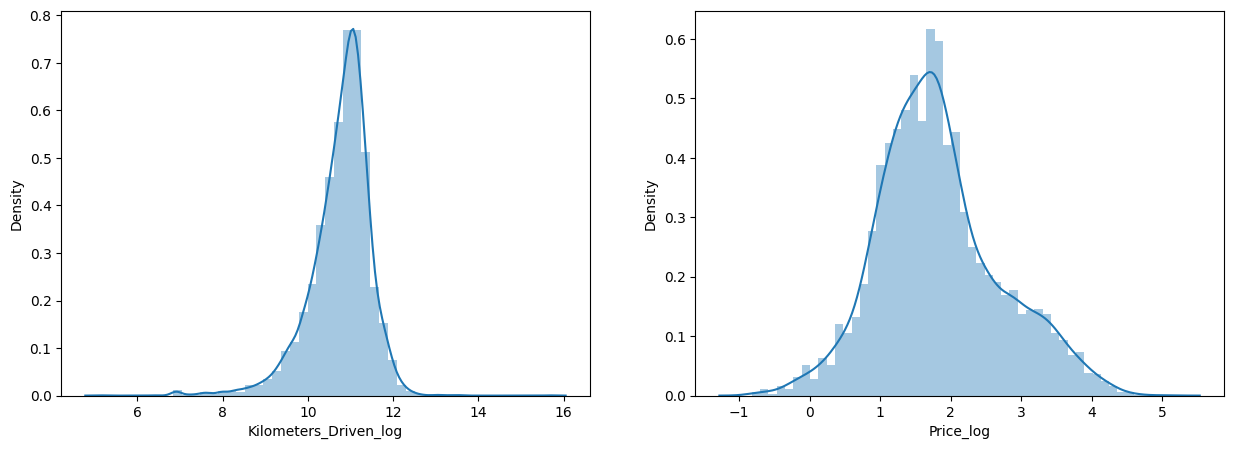

In [87]:
#Log transformation of the feature 'Kilometers_Driven'

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log")
plt.subplot(1,2,2)
sns.distplot(df["Price_log"], axlabel="Price_log")
plt.show()

# Step 12: EDA Bivariate Analysis

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

<Figure size 1300x1700 with 0 Axes>

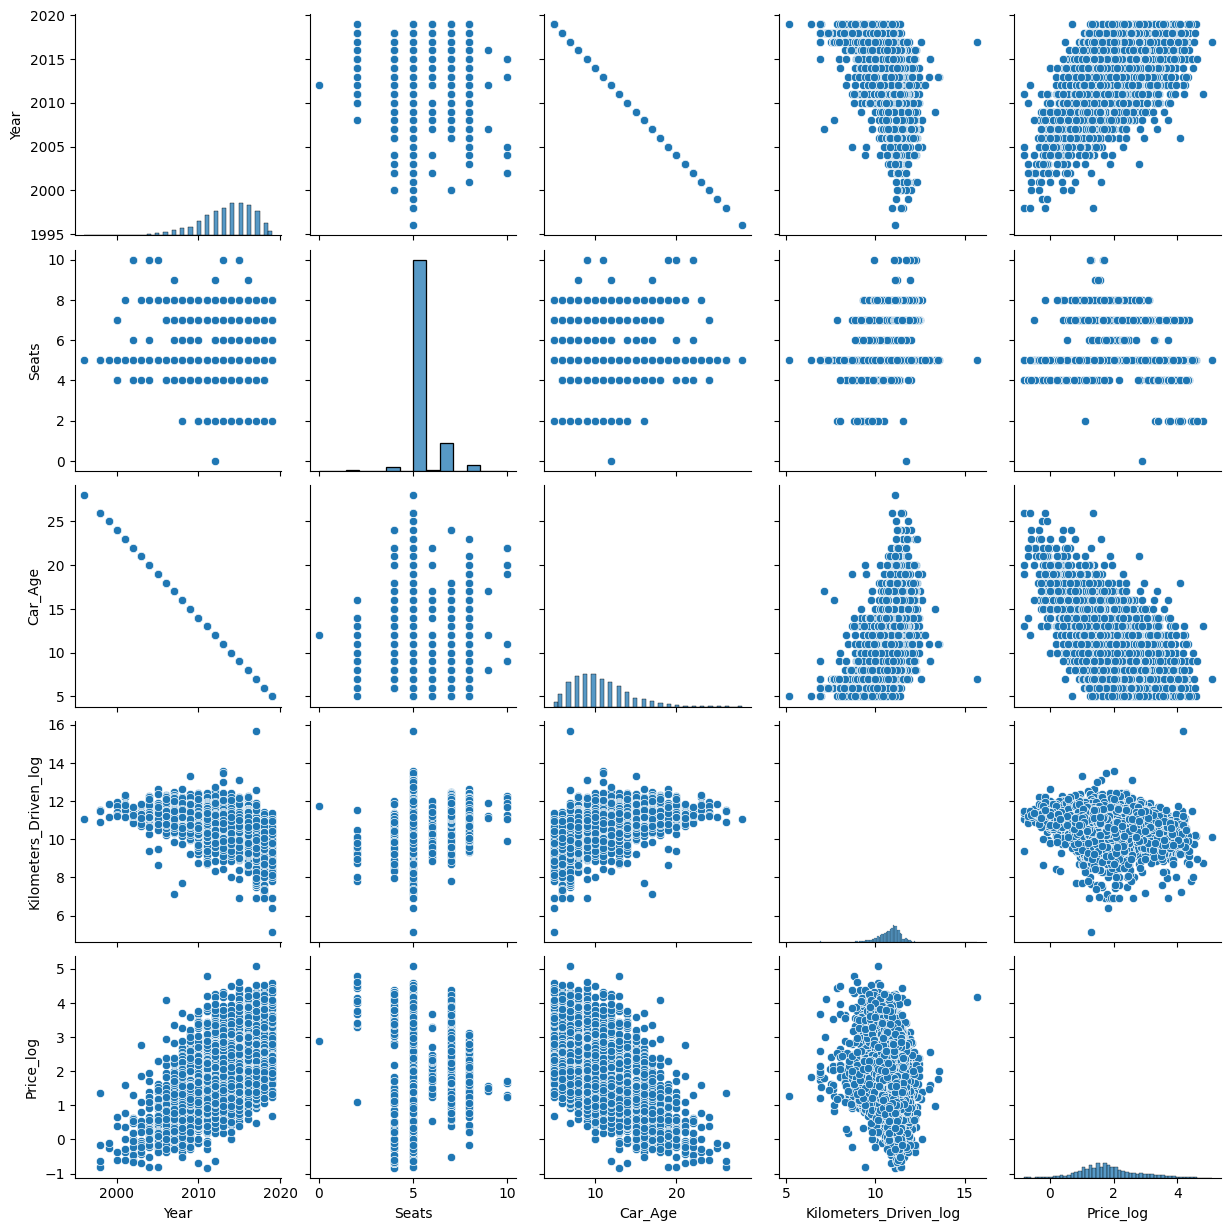

In [88]:
plt.figure(figsize=(13,17))
sns.pairplot(df.drop(["Kilometers_Driven","Price"],axis=1))
plt.show()

Pair Plot provides below insights:

* The variable Year has a positive correlation with price and mileage
* A year has a Negative correlation with kilometers-Driven
* Mileage is negatively correlated with Power
* As power increases, mileage decreases
* Car with recent make is higher at prices. As the age of the car increases price decreases
* Engine and Power increase, and the price of the car increases


A bar plot can be used to show the relationship between Categorical variables and continuous variables 

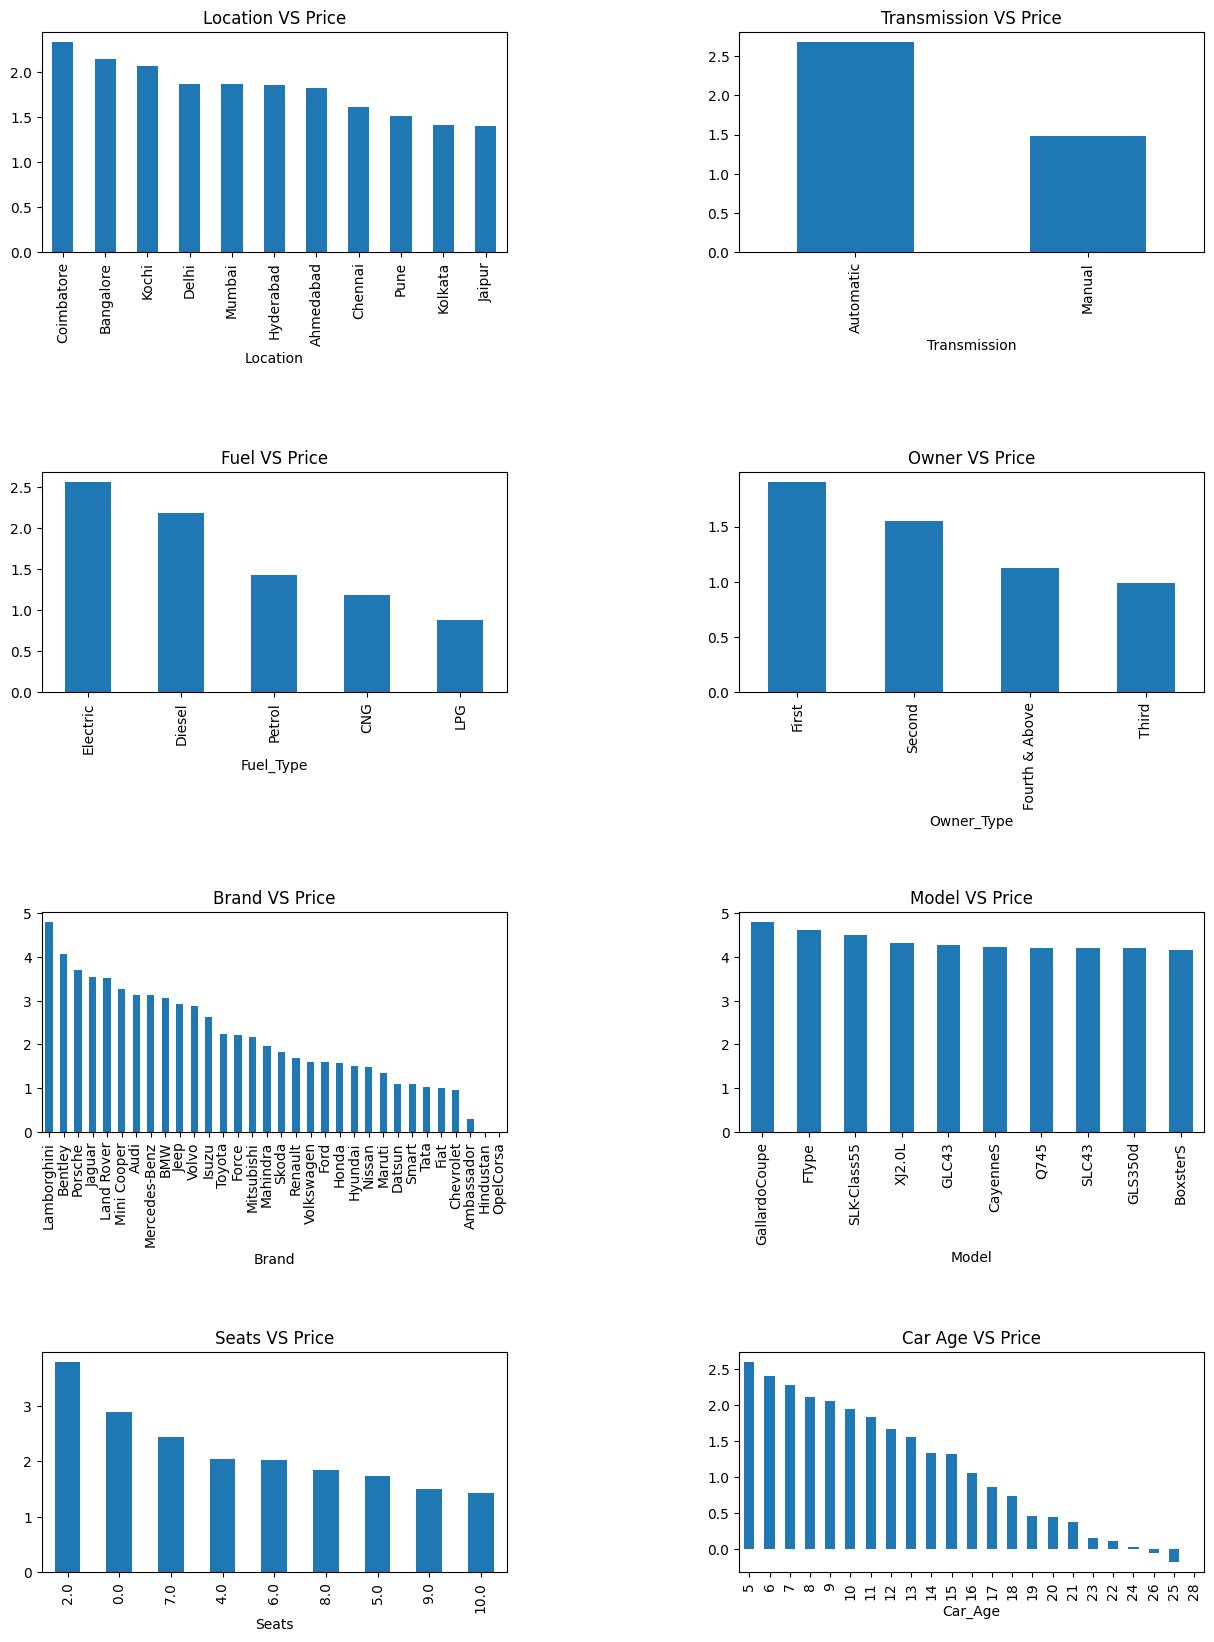

In [107]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
df.groupby("Location")["Price_log"].mean().sort_values(ascending=False).plot.bar()
plt.title("Location VS Price")

plt.subplot(4,2,2)
df.groupby("Transmission")["Price_log"].mean().sort_values(ascending=False).plot.bar()
plt.title("Transmission VS Price")

plt.subplot(4,2,3)
df.groupby("Fuel_Type")["Price_log"].mean().sort_values(ascending=False).plot.bar()
plt.title("Fuel VS Price")

plt.subplot(4,2,4)
df.groupby("Owner_Type")["Price_log"].mean().sort_values(ascending=False).plot.bar()
plt.title("Owner VS Price")

plt.subplot(4,2,5)
df.groupby("Brand")["Price_log"].mean().sort_values(ascending=False).plot.bar()
plt.title("Brand VS Price")

plt.subplot(4,2,6)
df.groupby("Model")["Price_log"].mean().sort_values(ascending=False).head(10).plot.bar()
plt.title("Model VS Price")

plt.subplot(4,2,7)
df.groupby("Seats")["Price_log"].mean().sort_values(ascending=False).plot.bar()
plt.title("Seats VS Price")

plt.subplot(4,2,8)
df.groupby("Car_Age")["Price_log"].mean().sort_values(ascending=False).plot.bar()
plt.title("Car Age VS Price")

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
plt.show()

Observations:
* The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
* Automatic cars have more price than manual cars.
* Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
* First-owner cars are higher in price, followed by a second
* The third owner’s price is lesser than the Fourth and above
* Lamborghini brand is the highest in price
* Gallardocoupe Model is the highest in price
* 2 Seater has the highest price followed by 7 Seater
* The latest model cars are high in price

# Step 13: EDA Multivariate Analysis

* As the name suggests, Multivariate analysis looks at more than two variables.
* Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our example heat map shows the correlation between the variables.

In [120]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'

<Figure size 1200x700 with 0 Axes>

From the Heat map, we can infer the following:
* The engine has a strong positive correlation to Power 0.86
* Price has a positive correlation to Engine 0.69 as well Power 0.77
* Mileage has correlated to Engine, Power, and Price negatively
* Price is moderately positive in correlation to year.
* Kilometer driven has a negative correlation to year not much impact on the price
* Car age has a negative correlation with Price
* car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also increase of car has a negative correlation with Mileage this makes sense

# Step 14: Impute Missing values

Missing data arise in almost all statistical analyses. There are many ways to impute missing values; we can impute the missing values by their Mean, median, most frequent, or zero values and use advanced imputation algorithms like KNN, Regularization, etc.

We cannot impute the data with a simple Mean/Median. We must need business knowledge or common insights about the data. If we have domain knowledge, it will add value to the imputation. Some data can be imputed on assumptions.

In our dataset, we have found there are missing values for many columns like Mileage, Power, and Seats.

We observed earlier some observations have zero Mileage. This looks like a data entry issue. We could fix this by filling null values with zero and then the mean value of Mileage since Mean and Median values are nearly the same for this variable chosen Mean to impute the values.

In [123]:
df.loc[df["Mileage"]==0.0,"Mileage"]=np.nan
df.Mileage.isnull().sum()

np.int64(2)

In [124]:
df["Mileage"].fillna(value=np.mean(df["Mileage"]),inplace=True)

TypeError: can only concatenate str (not "int") to str